# Global Power Plant Database

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix


In [37]:
# URLs for the datasets
url_usa = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/8f111fc0278f9a158324e726dbd5917365e50535/Global%20Power%20Plant%20Database/database_USA.csv'
url_aus = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/8f111fc0278f9a158324e726dbd5917365e50535/Global%20Power%20Plant%20Database/database_AUS.csv'
url_ind = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/8f111fc0278f9a158324e726dbd5917365e50535/Global%20Power%20Plant%20Database/database_IND.csv'

# Load the datasets into DataFrames
df_usa = pd.read_csv(url_usa)
df_aus = pd.read_csv(url_aus)
df_ind = pd.read_csv(url_ind)

# Combine the datasets into one
df = pd.concat([df_usa, df_aus, df_ind], ignore_index=True)

# Display the first few rows of the combined dataframe
print(df.head())


  country              country_long                            name  \
0     USA  United States of America  10 Briggs Solar NG  LLC (East)   
1     USA  United States of America      100 Brook Hill Drive Solar   
2     USA  United States of America      1001 Ebenezer Church Solar   
3     USA  United States of America             1008 Matthews Solar   
4     USA  United States of America               1009 Yadkin Solar   

    gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  USA0062781          0.0   41.6327   -71.4963          NaN         NaN   
1  USA0063292          2.0   41.0930   -73.9828        Solar         NaN   
2  USA0063444          0.0   36.2838   -80.8434          NaN         NaN   
3  USA0063447          0.0   36.2167   -80.5525          NaN         NaN   
4  USA0063445          0.0   36.1475   -80.6561          NaN         NaN   

  other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0         NaN  ...                2019.0           

In [7]:
# Display the first few rows of the dataframe
print(df.head())

# Get summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)


  country              country_long                            name  \
0     USA  United States of America  10 Briggs Solar NG  LLC (East)   
1     USA  United States of America      100 Brook Hill Drive Solar   
2     USA  United States of America      1001 Ebenezer Church Solar   
3     USA  United States of America             1008 Matthews Solar   
4     USA  United States of America               1009 Yadkin Solar   

    gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  USA0062781          0.0   41.6327   -71.4963          NaN         NaN   
1  USA0063292          2.0   41.0930   -73.9828        Solar         NaN   
2  USA0063444          0.0   36.2838   -80.8434          NaN         NaN   
3  USA0063447          0.0   36.2167   -80.5525          NaN         NaN   
4  USA0063445          0.0   36.1475   -80.6561          NaN         NaN   

  other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0         NaN  ...                2019.0           

In [8]:
# Fill missing values
df['capacity_mw'].fillna(df['capacity_mw'].median(), inplace=True)
df.fillna('Unknown', inplace=True)

# Convert appropriate columns to categorical
categorical_columns = ['country', 'primary_fuel', 'owner']
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [20]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=[
    'country', 'country_long', 'primary_fuel', 'other_fuel1', 
    'other_fuel2', 'other_fuel3', 'owner'
])

# Display the first few rows of the encoded dataframe
print(df_encoded.head())

                             name   gppd_idnr  capacity_mw  latitude  \
0  10 Briggs Solar NG  LLC (East)  USA0062781          0.0   41.6327   
1      100 Brook Hill Drive Solar  USA0063292          2.0   41.0930   
2      1001 Ebenezer Church Solar  USA0063444          0.0   36.2838   
3             1008 Matthews Solar  USA0063447          0.0   36.2167   
4               1009 Yadkin Solar  USA0063445          0.0   36.1475   

   longitude  commissioning_year                                  source  \
0   -71.4963                 NaN  U.S. Energy Information Administration   
1   -73.9828              2016.0  U.S. Energy Information Administration   
2   -80.8434                 NaN  U.S. Energy Information Administration   
3   -80.5525                 NaN  U.S. Energy Information Administration   
4   -80.6561                 NaN  U.S. Energy Information Administration   

                                            url  \
0  http://www.eia.gov/electricity/data/browser/   
1  http:

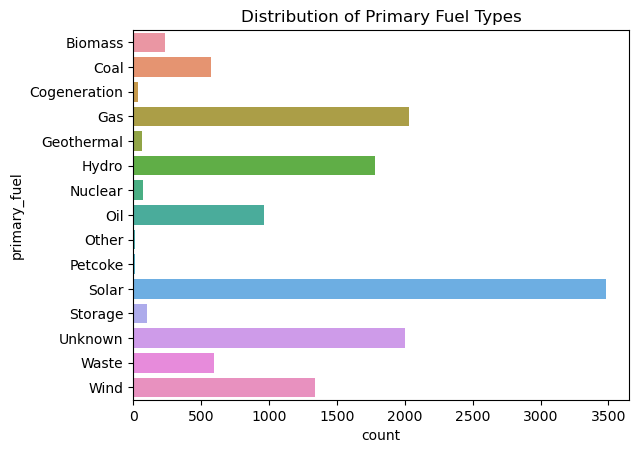

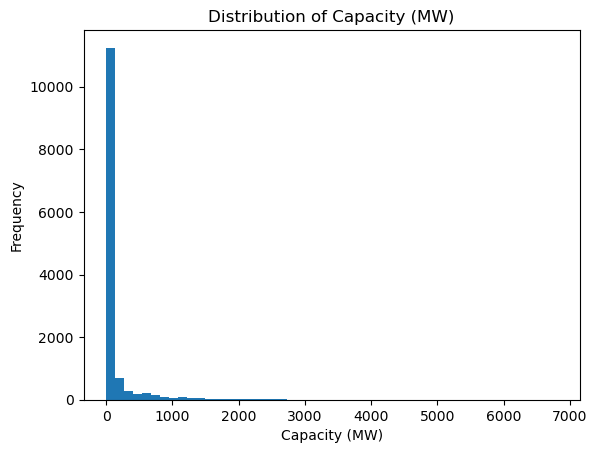

In [9]:
# Plotting distribution of primary fuel types
sns.countplot(y='primary_fuel', data=df)
plt.title('Distribution of Primary Fuel Types')
plt.show()

# Plotting distribution of capacity
plt.hist(df['capacity_mw'], bins=50)
plt.title('Distribution of Capacity (MW)')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()


In [13]:
print(df.columns)


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


In [14]:
# List of columns to drop if they exist in the DataFrame
columns_to_drop_fuel = ['primary_fuel', 'name', 'gppd_idnr', 'source', 'url', 'geolocation_source', 'generation_data_source', 
                        'other_fuel1', 'other_fuel2', 'other_fuel3', 
                        'estimated_generation_note_2013', 'estimated_generation_note_2014', 
                        'estimated_generation_note_2015', 'estimated_generation_note_2016', 
                        'estimated_generation_note_2017']

columns_to_drop_capacity = ['capacity_mw', 'name', 'gppd_idnr', 'source', 'url', 'geolocation_source', 'generation_data_source', 
                            'other_fuel1', 'other_fuel2', 'other_fuel3', 
                            'estimated_generation_note_2013', 'estimated_generation_note_2014', 
                            'estimated_generation_note_2015', 'estimated_generation_note_2016', 
                            'estimated_generation_note_2017']

# Drop columns that exist in the DataFrame for fuel prediction
X_fuel = df.drop(columns=[col for col in columns_to_drop_fuel if col in df.columns])
y_fuel = df['primary_fuel']

# Drop columns that exist in the DataFrame for capacity prediction
X_capacity = df.drop(columns=[col for col in columns_to_drop_capacity if col in df.columns])
y_capacity = df['capacity_mw']

# Check the shapes of the resulting dataframes to ensure they are as expected
print(X_fuel.shape, y_fuel.shape)
print(X_capacity.shape, y_capacity.shape)


(13298, 17) (13298,)
(13298, 17) (13298,)


In [16]:
# Extract features and target variables for primary_fuel prediction
X_fuel = df.drop(columns=[
    'primary_fuel', 'name', 'gppd_idnr', 'source', 'url', 'geolocation_source', 
    'generation_data_source', 'other_fuel1', 'other_fuel2', 'other_fuel3'
])
y_fuel = df['primary_fuel']

# Extract features and target variables for capacity_mw prediction
X_capacity = df.drop(columns=[
    'capacity_mw', 'name', 'gppd_idnr', 'source', 'url', 'geolocation_source', 
    'generation_data_source', 'other_fuel1', 'other_fuel2', 'other_fuel3'
])
y_capacity = df['capacity_mw']


In [21]:
# Convert categorical variables to numeric
df_encoded = pd.get_dummies(df, columns=['country', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner'])

# Create additional features if necessary 
df_encoded['plant_age'] = 2024 - df_encoded['commissioning_year']

# Drop columns that won't be used in prediction
df_encoded.drop(['name', 'gppd_idnr', 'source', 'url', 'geolocation_source', 'wepp_id'], axis=1, inplace=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()

,country_long,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,owner_Zapco Energy Tactics Corp,owner_Zeeland Farm Services,owner_Zero Waste Energy Development Company LLC,owner_Zion Energy LLC,owner_Zotos International,owner_Zumbro Garden LLC,owner_Zumbro Solar LLC,owner_esVolta LP,owner_iEnergy Wind Farms,plant_age
0,United States of America,0.0,41.6327,-71.4963,NaN,2019.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
1,United States of America,2.0,41.0930,-73.9828,2016.0,2019.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,8.0
2,United States of America,0.0,36.2838,-80.8434,NaN,2019.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
3,United States of America,0.0,36.2167,-80.5525,NaN,2019.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
4,United States of America,0.0,36.1475,-80.6561,NaN,2019.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


In [26]:
# Example of encoding categorical variables if needed
categorical_cols = ['country', 'owner']  # Adjust with your actual categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for later use if needed


In [27]:
# Assuming 'primary_fuel' and 'capacity_mw' are target variables
X = df.drop(columns=['primary_fuel', 'capacity_mw'])  # Features
y_primary_fuel = df['primary_fuel']  # Target for primary_fuel prediction
y_capacity_mw = df['capacity_mw']  # Target for capacity_mw prediction


In [17]:
from sklearn.model_selection import train_test_split

# Split data for primary_fuel prediction
X_fuel_train, X_fuel_test, y_fuel_train, y_fuel_test = train_test_split(X_fuel, y_fuel, test_size=0.2, random_state=42)

# Split data for capacity_mw prediction
X_capacity_train, X_capacity_test, y_capacity_train, y_capacity_test = train_test_split(X_capacity, y_capacity, test_size=0.2, random_state=42)


In [34]:
# Print shapes to verify splitting
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10638, 17)
X_test shape: (2660, 17)
y_train shape: (10638,)
y_test shape: (2660,)


In [1]:
import pandas as pd

# URLs for the datasets
url_usa = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/8f111fc0278f9a158324e726dbd5917365e50535/Global%20Power%20Plant%20Database/database_USA.csv'
url_aus = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/8f111fc0278f9a158324e726dbd5917365e50535/Global%20Power%20Plant%20Database/database_AUS.csv'
url_ind = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/8f111fc0278f9a158324e726dbd5917365e50535/Global%20Power%20Plant%20Database/database_IND.csv'

# Load the datasets into DataFrames
df_usa = pd.read_csv(url_usa)
df_aus = pd.read_csv(url_aus)
df_ind = pd.read_csv(url_ind)

# Combine the datasets into one
df = pd.concat([df_usa, df_aus, df_ind], ignore_index=True)


In [7]:
drop_columns = ['name', 'gppd_idnr', 'source', 'url', 'geolocation_source', 
                'generation_data_source', 'other_fuel1', 'other_fuel2', 
                'other_fuel3', 'estimated_generation_note_2013', 
                'estimated_generation_note_2014', 'estimated_generation_note_2015', 
                'estimated_generation_note_2016', 'estimated_generation_note_2017']

# Drop columns that exist in the DataFrame
df = df.drop(columns=[col for col in drop_columns if col in df.columns])


In [8]:
# Extract features (X) and target (y) for primary_fuel prediction
X_primary_fuel = df.drop(columns=['primary_fuel'])
y_primary_fuel = df['primary_fuel']

# Extract features (X) and target (y) for capacity_mw prediction
X_capacity_mw = df.drop(columns=['capacity_mw'])
y_capacity_mw = df['capacity_mw']


In [16]:
# checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

0.0       2030
5.0        552
1.0        534
2.0        479
1.5        267
          ... 
621.2        1
1058.5       1
1053.0       1
391.5        1
106.6        1
Name: capacity_mw, Length: 2304, dtype: int64

In [18]:
#checking the list of counts of primary_fuel
df['primary_fuel'].value_counts()

Solar           3480
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

In [19]:
#checking the uniqueness of primary_fuel
df['primary_fuel'].unique()

array([nan, 'Solar', 'Gas', 'Oil', 'Hydro', 'Wind', 'Coal', 'Biomass',
       'Waste', 'Storage', 'Cogeneration', 'Geothermal', 'Petcoke',
       'Nuclear', 'Other'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Separate features and target for capacity prediction
X = df_encoded.drop('capacity_mw', axis=1)
y = df_encoded['capacity_mw']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
capacity_model = RandomForestRegressor(random_state=42)
capacity_model.fit(X_capacity_train, y_capacity_train)

# Predict
y_capacity_pred = capacity_model.predict(X_capacity_test)

# Evaluate
mse = mean_squared_error(y_capacity_test, y_capacity_pred)
print("Mean Squared Error for Capacity Prediction:", mse)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
capacity_model = RandomForestRegressor(random_state=42)
capacity_model.fit(X_capacity_train, y_capacity_train)

# Predict
y_capacity_pred = capacity_model.predict(X_capacity_test)

# Evaluate
mse = mean_squared_error(y_capacity_test, y_capacity_pred)
print("Mean Squared Error for Capacity Prediction:", mse)
